In [1]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, decomposition, datasets
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import PrecisionRecallDisplay

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import os
import matplotlib.pyplot as plt
import math
import random

# my script
from w210_model_library import print_confusion_matrix, modelresults
from w210_model_library import modelresults_2, crossvalidation,assignRisk
from w210_model_library import newPred, riskdistribution, fattrtype, importance_attr

# random.seed(1234)

dirname = '../modeldata/'
dirpm = '../prediction_train_test/'

cols1 = ['Key','train_test','lon_t_x', 'lat_t', 'Group_x','label','Prediction','No_SH', 'SH', 'Num', 'name_x', 'DateD',
        'imgnum','Sinkhole', 'ID',  'geometry', 'AnnualCrop', 'Forest',
        'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
        'River', 'SeaLake', 'prediction', 'prediction_name', 'l25', 'l50', 'l75', 'l100', 'l150', 'l200', 
        'l250', 'l300', 'l500', 'l750', 'l1000', 'l1000plus', 'coloc', 'Y25', 'Y50', 'Y75', 'Y100', 'Y150',
        'Y200', 'Y250', 'Y300', 'Y500', 'Y750', 'Y1000', 'Y1000plus', 'Ycoloc', 'Key_ws', 'ws_name',
        'lon_w', 'lat_w', 'County', 'Calcium Carbonate', 'Gypsum', 'Soil Health Organic Matter',
        'Percent Clay', 'Percent Sand', 'Percent Silt', 'Available Water Storage', 'rolling_7_precip',
        'rolling_15_precip', 'rolling_30_precip', 'rolling_60_precip', 'rolling_90_precip', 'y1_mean_prc',
        'y1_max_prc', 'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp', 'y2_mean_prc', 'y2_max_prc', 'y2_mean_tmp',
        'y2_max_tmp', 'y2_min_tmp', 'y3_mean_prc', 'y3_max_prc', 'y3_mean_tmp', 'y3_max_tmp', 'y3_min_tmp',
        'gridcode']

## Read 365 or ZERO delts Saved File

In [2]:
# PLEASE PICK THE ATTRIBUTE FILE TO WORK
# finEvents = pd.read_csv(dirname+"data_model1_0.csv")
finEvents = pd.read_csv(dirname+"data_model1_365.csv")
finEvents.isnull().values.any(), finEvents.isnull().sum().sum()

(False, 0)

In [3]:
finEvents = finEvents.dropna()
finEvents.isnull().values.any(), finEvents.isnull().sum().sum()

(False, 0)

## Select Variables

In [4]:
# shvars = ['l25', 'l50', 'l75', 'l100', 'l150','l200', 'l250', 'l300', 'l500', 'l750', 'l1000',
#           'Y25', 'Y50', 'Y75', 'Y100', 'Y150', 'Y200', 'Y250', 'Y300', 'Y500','Y750', 'Y1000']

# satvars = ['AnnualCrop', 'Forest','HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 
#            'PermanentCrop', 'Residential', 'River', 'SeaLake']

# wsvars = ['y1_mean_prc', 'y1_max_prc', 'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp',
#           'y2_mean_prc', 'y2_max_prc', 'y2_mean_tmp', 'y2_max_tmp', 'y2_min_tmp', 
#           'y3_mean_prc', 'y3_max_prc', 'y3_mean_tmp', 'y3_max_tmp', 'y3_min_tmp']

# wsvars2 = ['y1_mean_prc', 'y1_max_prc', 'y1_max_tmp', 'y1_min_tmp',
#           'y2_mean_prc', 'y2_max_prc', 'y2_max_tmp', 'y2_min_tmp', 
#           'y3_mean_prc', 'y3_max_prc', 'y3_max_tmp', 'y3_min_tmp']

# wsrolling = ['rolling_7_precip', 'rolling_15_precip', 'rolling_30_precip',
#              'rolling_60_precip', 'rolling_90_precip']

# wsvars3 = ['y1_mean_prc', 'y1_max_prc', 'y1_mean_tmp', 'y1_max_tmp', 'y1_min_tmp']

# karst1 = ['gridcode']

# soilattr = ['Calcium Carbonate', 'Soil Health Organic Matter', 'Percent Clay', 
#             'Gypsum',
#             'Percent Sand','Percent Silt', 'Available Water Storage']

# x_variables = shvars  + satvars + wsrolling + karst1 + soilattr + wsvars

# # x_variables = shvars  + wsvars2 + karst1 + soilattr

# attrdict = {"Sinkhole": shvars, "Satellite": satvars, "Weather Rolling": wsrolling,
#             "Karst": karst1, "Soil": soilattr, "Weather Yearly": wsvars}

# print(x_variables)
# print(len(x_variables))

# # One Hot Encoding - Use if there are categorical attributes (in this data - there are not)
# features = finEvents[x_variables]
# # One-hot encode the data using pandas get_dummies
# features = pd.get_dummies(features)

In [5]:
dfvars = pd.read_csv(dirname+"attr80.csv")

x_variables = list(dfvars["attribute"].unique())
len(x_variables)
features = finEvents[x_variables]

In [6]:
print(x_variables)

['l200', 'Y250', 'l75', 'Y200', 'Y500', 'l150', 'l50', 'l500', 'Y300', 'l300', 'Y1000', 'l25', 'Y100', 'Y750', 'y2_mean_prc', 'l750', 'Y150', 'Y75', 'PermanentCrop', 'Highway', 'Percent Sand', 'Forest', 'Available Water Storage', 'Percent Silt', 'Industrial', 'Residential', 'Pasture', 'y1_max_tmp', 'rolling_60_precip', 'y3_max_tmp', 'HerbaceousVegetation', 'rolling_7_precip', 'y2_mean_tmp', 'l250']


In [7]:
np.random.seed(42)

X = np.array(features)
Y = np.array(finEvents["Sinkhole"])
Group = np.array(finEvents["Group"])
Keys = np.array(finEvents["Key"])
Lon_t = np.array(finEvents["lon_t"])
Lat_t = np.array(finEvents["lat_t_x"])

shuffle = np.random.permutation(np.arange(X.shape[0]))

X, Y, Group = X[shuffle], Y[shuffle], Group[shuffle]
Keys, Lon_t, Lat_t = Keys[shuffle], Lon_t[shuffle], Lat_t[shuffle]


# Define sizes for train, development and test data (0.8, 0.0, 0.2)
train = 0.80
val = 0
test = 1- train

num_images = len(Y)
train_size = int(round(num_images * train,0))
val_size = int(round(num_images * val,0))
test_size = num_images - train_size - val_size

print(train_size, val_size, test_size)

test_data, test_labels, test_group = X[train_size+val_size:], Y[train_size+val_size:], Group[train_size+val_size:]
test_keys, test_lont_t, test_lat_t = Keys[train_size+val_size:],  Lon_t[train_size+val_size:], Lat_t[train_size+val_size:]

# val_data, val_labels = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]
train_data, train_labels, train_group = X[:train_size], Y[:train_size], Group[:train_size]
train_keys, train_lon_t, train_lat_t = Keys[:train_size],  Lon_t[:train_size], Lat_t[:train_size]

dftrain = pd.DataFrame({"Key": train_keys, "lon_t": train_lon_t, "lat_t": train_lat_t, "Group": train_group})
dftest = pd.DataFrame({"Key": test_keys, "lon_t": test_lont_t, "lat_t":test_lat_t, "Group": test_group })

print(len(test_data), len(train_data), len(train_group))

np.count_nonzero(Y == 0), np.count_nonzero(Y == 1)

178 0 44
44 178 178


(110, 112)

### Find the Best Hyperparameters

**cv: int**, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:

- None, to use the default 5-fold cross validation,
- integer, to specify the number of folds in a (Stratified)KFold,
- CV splitter,
- An iterable yielding (train, test) splits as arrays of indices.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter



## Random Forest Test

In [8]:
scaler = StandardScaler()
model = RandomForestClassifier()
parameters = [{'mod__n_estimators': [20, 30, 40, 50, 60, 70, 80],
               'mod__max_depth': [2, 3, 4]}]

# 

# Scoring options: accuracy, precision, recall

gspipeline = crossvalidation(scaler, model, parameters, train_data, train_labels, 10, 'recall')
#grid_pipeline.best_params_
# gspipeline.best_estimator_.get_params()

In [9]:
n_estimators = gspipeline.best_estimator_.get_params()["mod__n_estimators"]
max_depth = gspipeline.best_estimator_.get_params()["mod__max_depth"]
print("mod__n_estimators: ",n_estimators, " max_depth: ", max_depth)
# grid_pipeline.best_estimator_.get_params()

mod__n_estimators:  60  max_depth:  4


In [10]:
# scaler = none, if no scaler to be used. Otherwiser use StandardScaler()
fmodel = RandomForestClassifier(n_estimators=n_estimators, max_depth= max_depth, random_state=1234)

dfres, dfpre, pipeline_rf = modelresults_2(train_data, train_labels, 
                                      test_data, test_labels, 
                                      StandardScaler(), fmodel)
dfres

,Train,Test
Accuracy,0.882022,0.681818
Precision,0.972603,0.722222
Recall,0.788889,0.590909
F1_score,0.871166,0.650000
F1_score_weighted,0.881066,0.679167


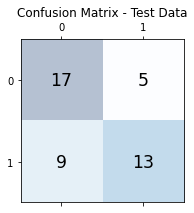

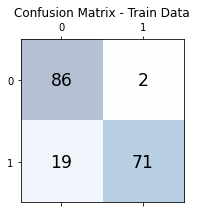

In [11]:
print_confusion_matrix(test_labels, dfpre["Test"], "Confusion Matrix - Test Data")
print_confusion_matrix(train_labels, dfpre['Train'], "Confusion Matrix - Train Data")

In [12]:
dfprobTest_RF = riskdistribution(test_data, test_labels, test_group, dfpre['Test'], 0.5, 0.25, pipeline_rf)
pivot = np.round(pd.pivot_table(dfprobTest_RF, values='Value', 
                                index='Group', 
                                columns='Risk', 
                                aggfunc='count'),2)
pivot

Risk,High,Low,Medium
Group,,,
0,13.0,3.0,6.0
1,NaN,4.0,4.0
2,5.0,2.0,7.0


In [13]:
def joinpredict(model, data, labels, df, dfr, cols1, traintest):
    
    pred_prob = model.predict_proba(data)
    df["label"] = labels
    df["train_test"] = traintest
    df["Prediction"] = model.predict(data)
    df["No_SH"] = pred_prob[:,0]
    df["SH"] = pred_prob[:,1]
    df["Num"] = 1
    
    df = pd.merge(df, dfr, how="left", on="Key" )
    df = df[cols1]
    df = df.rename(columns= {'lon_t_x': "lon_t"})
    
    return df

In [14]:
dftrain1 = joinpredict(fmodel, train_data, train_labels, dftrain, finEvents, cols1, "train")
dftest1 = joinpredict(fmodel, test_data, test_labels, dftest, finEvents, cols1, "test")
dffin = pd.concat([dftrain1, dftest1])
print(len(dffin))
dffin.head()

222


,Key,train_test,lon_t,lat_t,Group_x,label,Prediction,No_SH,SH,Num,...,y2_max_prc,y2_mean_tmp,y2_max_tmp,y2_min_tmp,y3_mean_prc,y3_max_prc,y3_mean_tmp,y3_max_tmp,y3_min_tmp,gridcode
0,2010_0_1,train,-80.629636,27.377177,1,0,1,0.343356,0.656644,1,...,0.00,72.064110,83.8,47.6,0.000000,0.00,68.205753,83.3,42.6,2
1,2459_0_2,train,-81.521305,28.504864,2,0,1,0.325904,0.674096,1,...,4.10,74.223836,87.7,47.2,0.150000,7.48,73.503288,85.5,41.1,2
2,2334_1_0,train,-82.159477,29.209624,0,1,1,0.370071,0.629929,1,...,2.66,69.867671,83.6,34.7,0.000741,0.09,71.441918,85.6,38.6,2
3,3003_0_2,train,-81.285103,28.732048,2,0,1,0.318715,0.681285,1,...,2.30,73.426301,86.2,45.7,0.125507,1.91,72.278630,85.6,39.2,1
4,2334_0_1,train,-84.908569,30.482215,1,0,1,0.364408,0.635592,1,...,5.66,68.090137,85.8,31.3,0.126822,7.63,70.206301,91.7,33.9,1


In [15]:
dffin.to_csv("../prediction_train_test/rf_traintest_pred.csv")

## Predictions

In [16]:
SU_data = pd.read_csv(dirname+"scale_up_F_satellite_ws_soil_karst_sh_attr.csv")
SU_data = SU_data.dropna()
SU_features = SU_data[x_variables]
SU_test = np.array(SU_features)
SU_test.shape

(399112, 34)

In [17]:
# Function to Create DataFrame with High, Medium, Low Risk Distribution for a given data
def predprob(data, pipeline, SU_data):
    
    pred_prob = pipeline.predict_proba(data)
    dfprob = pd.DataFrame()
    dfprob["Key"] = SU_data["Key"]
    dfprob["lon_t"] = SU_data["lon_t"]
    dfprob["lat_t"] = SU_data["lat_t"]
    dfprob["No_SH"] = pred_prob[:,0]
    dfprob["SH"] = pred_prob[:,1]
    dfprob["Prediction"] = pipeline.predict(data)
    
    return (dfprob)

In [18]:
rf_prob = predprob(SU_test, fmodel, SU_data)
rf_prob.shape

(399112, 6)

In [19]:
# rf_prob.to_csv("../predictions/rf80_prediction.csv", index=False)

In [20]:
rf_prob["Prediction"].value_counts()

1    399112
Name: Prediction, dtype: int64